### Import Library

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

### Load Dataset

In [2]:
# Loading the merged dataset
data = pd.read_csv('/kaggle/input/ecgsignal/ECGSignal_Data.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-0.135,-0.115,-0.105,-0.105,-0.115,-0.115,-0.115,-0.105,-0.105,-0.135,...,0.075,0.035,-0.025,-0.055,-0.075,-0.115,-0.135,-0.135,-0.135,0
1,-0.105,-0.095,-0.085,-0.095,-0.095,-0.105,-0.085,-0.095,-0.095,-0.105,...,0.025,-0.025,-0.055,-0.105,-0.145,-0.155,-0.165,-0.165,-0.185,0
2,-0.105,-0.115,-0.125,-0.105,-0.115,-0.105,-0.105,-0.095,-0.095,-0.105,...,0.065,0.005,-0.045,-0.075,-0.105,-0.115,-0.115,-0.135,-0.125,0
3,-0.075,-0.075,-0.085,-0.075,-0.075,-0.075,-0.065,-0.075,-0.065,-0.065,...,0.085,0.035,-0.005,-0.065,-0.055,-0.095,-0.095,-0.105,-0.125,0
4,-0.065,-0.085,-0.075,-0.065,-0.075,-0.045,-0.055,-0.075,-0.065,-0.065,...,0.085,0.015,-0.045,-0.085,-0.135,-0.135,-0.155,-0.155,-0.165,0


In [3]:
X = data.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-0.135,-0.115,-0.105,-0.105,-0.115,-0.115,-0.115,-0.105,-0.105,-0.135,...,0.175,0.075,0.035,-0.025,-0.055,-0.075,-0.115,-0.135,-0.135,-0.135
1,-0.105,-0.095,-0.085,-0.095,-0.095,-0.105,-0.085,-0.095,-0.095,-0.105,...,0.095,0.025,-0.025,-0.055,-0.105,-0.145,-0.155,-0.165,-0.165,-0.185
2,-0.105,-0.115,-0.125,-0.105,-0.115,-0.105,-0.105,-0.095,-0.095,-0.105,...,0.135,0.065,0.005,-0.045,-0.075,-0.105,-0.115,-0.115,-0.135,-0.125
3,-0.075,-0.075,-0.085,-0.075,-0.075,-0.075,-0.065,-0.075,-0.065,-0.065,...,0.165,0.085,0.035,-0.005,-0.065,-0.055,-0.095,-0.095,-0.105,-0.125
4,-0.065,-0.085,-0.075,-0.065,-0.075,-0.045,-0.055,-0.075,-0.065,-0.065,...,0.155,0.085,0.015,-0.045,-0.085,-0.135,-0.135,-0.155,-0.155,-0.165


In [4]:
y = data.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 125, dtype: int64

In [5]:
print(f"The Shape of the X: {X.shape}")
print(f"The Shape of the y: {y.shape}")

The Shape of the X: (189459, 125)
The Shape of the y: (189459,)


### Dividing Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Without Sampling

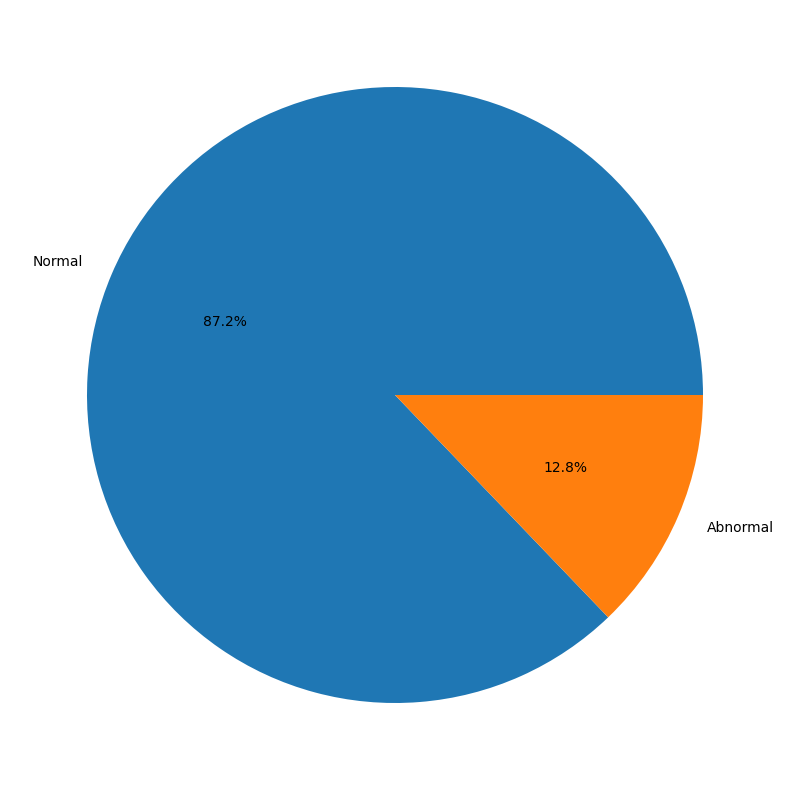

In [7]:
per_classes = data.iloc[:, -1].value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
plt.show()

In [8]:
# importing library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [9]:
# model define

knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [10]:
clfs = {
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [11]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [12]:
# train_classifier(xgb,X_train,y_train,X_test,y_test)

In [13]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print(f"For Algorithm {name} the Accuracy: {current_accuracy}, Precision: {current_precision}, Recall: {current_recall}, f1_score: {current_f1}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For Algorithm KN the Accuracy: 0.9765121925472395, Precision: 0.9512195121951219, Recall: 0.8605898123324397, f1_score: 0.9036379385015159
For Algorithm DT the Accuracy: 0.9216985115591682, Precision: 0.8776083467094703, Recall: 0.4510208290369148, f1_score: 0.5958316305680426
For Algorithm LR the Accuracy: 0.9003483584925578, Precision: 0.8868060562364816, Recall: 0.25366054856671477, f1_score: 0.3944836433611289
For Algorithm RF the Accuracy: 0.97297582603188, Precision: 0.9605104743558873, Recall: 0.8226438440915653, f1_score: 0.8862475005554322
For Algorithm AdaBoost the Accuracy: 0.9118019634751399, Precision: 0.8027320208919244, Recall: 0.4120437203547123, f1_score: 0.544562551103843
For Algorithm ETC the Accuracy: 0.9751926528027024, Precision: 0.9683680805176133, Recall: 0.8333677046813776, f1_score: 0.8958102416315673
For Algorithm GBDT the Accuracy: 0.9322020479256835, Precision: 0.930188679245283, Recall: 0.5083522375747577, f1_score: 0.6574209894652621
For Algorithm xgb the

In [14]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, "F1_score": f1_scores}).sort_values('Precision',ascending=False)

In [15]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
5,ETC,0.975193,0.968368,0.833368,0.895810
3,RF,0.972976,0.960510,0.822644,0.886248
0,KN,0.976512,0.951220,0.860590,0.903638
7,xgb,0.970178,0.939702,0.819550,0.875523
6,GBDT,0.932202,0.930189,0.508352,0.657421
2,LR,0.900348,0.886806,0.253661,0.394484
1,DT,0.921699,0.877608,0.451021,0.595832
4,AdaBoost,0.911802,0.802732,0.412044,0.544563


## After Sampling

In [16]:
# Increasing the data
sm = SMOTE(k_neighbors=6)
updated_X, updated_y = sm.fit_resample(X, y)

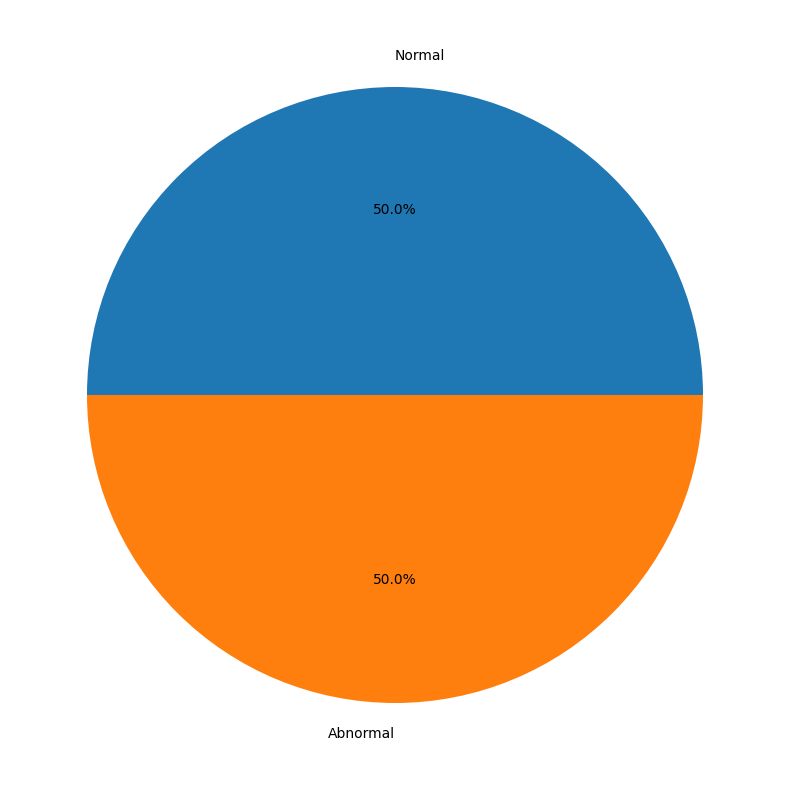

In [17]:
# Checking the class size
per_classes = updated_y.value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
plt.show()

In [18]:
train_x, test_x, train_y, test_y = train_test_split(updated_X, updated_y, test_size = 0.2, random_state=42)

In [19]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, train_x, train_y, test_x, test_y)

    print(f"For Algorithm {name} the Accuracy: {current_accuracy}, Precision: {current_precision}, Recall: {current_recall}, f1_score: {current_f1}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For Algorithm KN the Accuracy: 0.9810166823094856, Precision: 0.9665257223396758, Recall: 0.9965485921889191, f1_score: 0.9813075753510418
For Algorithm DT the Accuracy: 0.7696872445426746, Precision: 0.9331842054075082, Recall: 0.5809869815319406, f1_score: 0.7161249393588833
For Algorithm LR the Accuracy: 0.6963274697992673, Precision: 0.7646506692784851, Recall: 0.5672721768089616, f1_score: 0.6513366009663851
For Algorithm RF the Accuracy: 0.9848163734899633, Precision: 0.9866585625284912, Recall: 0.9829246139872843, f1_score: 0.9847880488359749
For Algorithm AdaBoost the Accuracy: 0.8092433921705168, Precision: 0.8558191381892918, Recall: 0.7438086587950348, f1_score: 0.7958922526199848
For Algorithm ETC the Accuracy: 0.988722032153562, Precision: 0.9902213854049622, Recall: 0.9871934604904632, f1_score: 0.9887051046862445
For Algorithm GBDT the Accuracy: 0.8611977353235036, Precision: 0.9239845054906002, Recall: 0.7871631849833485, f1_score: 0.8501038107538132
For Algorithm xgb t

In [20]:
smote_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, "F1_score": f1_scores}).sort_values('Precision',ascending=False)

In [21]:
smote_performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
5,ETC,0.988722,0.990221,0.987193,0.988705
3,RF,0.984816,0.986659,0.982925,0.984788
7,xgb,0.953995,0.968829,0.938177,0.953257
0,KN,0.981017,0.966526,0.996549,0.981308
1,DT,0.769687,0.933184,0.580987,0.716125
6,GBDT,0.861198,0.923985,0.787163,0.850104
4,AdaBoost,0.809243,0.855819,0.743809,0.795892
2,LR,0.696327,0.764651,0.567272,0.651337
